In [252]:
#1-import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
#import data and read it and find structure
df=pd.read_csv('mult_regr.csv')
df.head()
#df.shape
#df.info()
#df.describe

,y,x1,x2,x3,x4,x5
0,0.686773,1.000000,1.000000,0.000000,0.761594,0.841471
1,1.093027,1.034469,1.070126,0.033888,0.775695,0.859591
2,0.585253,1.068938,1.142629,0.066666,0.789061,0.876690
3,1.803227,1.103407,1.217508,0.098403,0.801720,0.892748
4,1.173517,1.137876,1.294763,0.129164,0.813698,0.907745


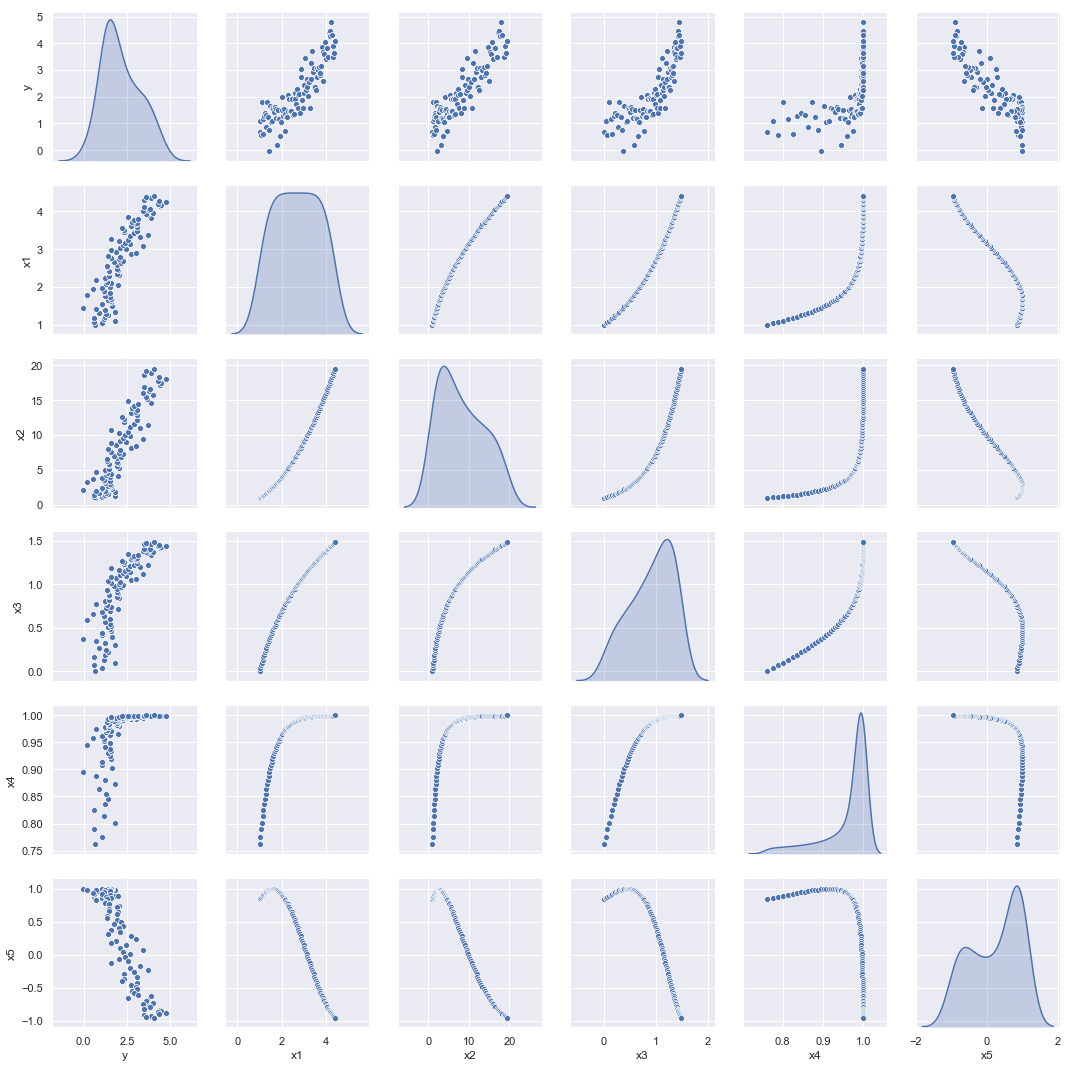

In [233]:
#pairwaise scatter plot of all variables
sns.set()
sns.pairplot(df,diag_kind='kde')  # scatter matrix for variables 

In [234]:
#split into independent and dependent variable
X=df.iloc[:,1:6]   #independent
#X.head() 
y=df.iloc[:,0]         #dependent
#Y.head()

In [235]:
#data spiliting into traing and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [236]:
#part-1 (a)
#corelation matrix for traing set
X_train.corr()

,x1,x2,x3,x4,x5
x1,1.000000,0.986374,0.982292,0.798974,-0.966867
x2,0.986374,1.000000,0.938976,0.699580,-0.988328
x3,0.982292,0.938976,1.000000,0.894690,-0.905416
x4,0.798974,0.699580,0.894690,1.000000,-0.624123
x5,-0.966867,-0.988328,-0.905416,-0.624123,1.000000


observation from the correlation matrix - From the above table it is clear that x1 is highly corelated with x2 and x3. similarly x2 and x5 are also corelated.

#Part-1
c-Find out the VIF associated with all the features. Your conclusions

In [237]:

#VIF calculation:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [238]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,31176.990656,x1
1,1952.783769,x2
2,2757.192398,x3
3,8307.990144,x4
4,307.291897,x5


Observation on VIF- From the above VIF values (too high) we can see that there is high 
multicolinearity present. We need to drop some of the variables.

Part-2 -a
Use the training set to create a MLR model using all the predictors (x1 … x5) and record the
regression outcomes and metrics (beta values, t-values, p-values, R-squared, training RMSE,
testing RMSE)

In [242]:
#part2 (a)
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_MLR = sm.OLS(y_train,X_train).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     71.51
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           7.22e-25
Time:                        22:40:06   Log-Likelihood:                -42.134
No. Observations:                  70   AIC:                             96.27
Df Residuals:                      64   BIC:                             109.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8923    280.850      0.544      0.588    -408.171     713.955
x1           -68.4805    125.725     -0.545      0.588    -319.646     182.685
x2             5.0071      8.815      0.568      0.572     -12.603      22.617
x3           110.7187    205.316      0.539      0.592    -299.448     520.885
x4          -111.9152    208.837     -0.536      0.594    -529.116     305.286
x5            -3.8995      6.579     -0.593      0.555     -17.042       9.243
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.719
Skew:                          -0.381   Prob(JB):                        0.423
Kurtosis:                       3.094   Cond. No.                     8.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
#training and test RMSE
Predict_train=model_MLR.predict(X_train)
Predict_test=model_MLR.predict(X_test)
error_train,error_test=y_train-Predict_train,y_test-Predict_test
RMSE_train=np.sqrt((np.sum(error_train**2))/len(X_train))
RMSE_test=np.sqrt((np.sum(error_test**2))/len(X_test))
print('train_RMSE =',RMSE_train)
print('test_RMSE =',RMSE_test)

train_RMSE = 0.4417466963205227
test_RMSE = 0.45771722443758156


Conclsion(2a)- From the above resulst we see that although none of variables are statistically 
(p>>0.25) significant ,still the R^2 value is high .This is primarily symptom of multicollinearity
 .Also the RMSE for traing and test in  very low. This means that model is working well for prediction 
    tasks. but if we want to effect of individual features on model. We will fail. so we need to
    remove multicollinearity from the  model.

Part-2 (b) Now use the backward selection steps to eliminate undesired features from the model. After
each elimination, record the regression outcomes and metrics (as above), and also the VIF
associated with the selected features

In [ ]:
#remove some feature --only take x2,and x4 
X1=df.loc[:,['x2','x4']]
y1=df.iloc[:,0]

In [244]:
#new test/train set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=44)
#X_train1.head()
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)
model_MLR1 = sm.OLS(y_train1,X_train1).fit()
model_MLR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     166.1
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.09e-26
Time:                        22:40:16   Log-Likelihood:                -38.613
No. Observations:                  70   AIC:                             83.23
Df Residuals:                      67   BIC:                             89.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9833      1.063      2.807      0.007       0.862       5.105
x2             0.1989      0.014     14.098      0.000       0.171       0.227
x4            -2.6059      1.190     -2.190      0.032      -4.981      -0.231
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.409
Skew:                          -0.180   Prob(JB):                        0.815
Kurtosis:                       2.898   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
#now find vif of new dataframe with only x2 and x4
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1

,VIF Factor,features
0,3.779786,x2
1,3.779786,x4


In [246]:
#training and test RMSE
Predict_train1=model_MLR1.predict(X_train1)
Predict_test1=model_MLR1.predict(X_test1)
error_train1,error_test1=y_train1-Predict_train1,y_test1-Predict_test1
RMSE_train1=np.sqrt((np.sum(error_train1**2))/len(X_train1))
RMSE_test1=np.sqrt((np.sum(error_test1**2))/len(X_test1))
print('train1_RMSE =',RMSE_train1)
print('test1_RMSE =',RMSE_test1)

train1_RMSE = 0.42007247392433683
test1_RMSE = 0.5141368014800325


comments:now when we took only two variable x2 and x4 that are little corelated we can see the decrese 
in VIF values. also the beta values have decresed as compare to previous model where those were so large
Also these is no effect on value of R^2 even we have removed three features. 
Furthe now we can see that VIF values for x2 and x4 are same, we can remove x4 that is also not 
statistically significant (p>0.025) so we can also remove x4 and only x2 will be enough to model the 
data.


In [247]:
X1.corr()

,x2,x4
x2,1.000000,0.703339
x4,0.703339,1.000000


In [248]:
#Final model with only single variable x2
Xf=df.loc[:,'x2']
yf=df.iloc[:,0]
#new test/train set
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3, random_state=44)
#X_train1.head()
X_train1 = sm.add_constant(X_train1)
model_MLRf = sm.OLS(y_trainf,X_trainf).fit()
model_MLRf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1009.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.43e-43
Time:                        22:40:28   Log-Likelihood:                -60.455
No. Observations:                  70   AIC:                             122.9
Df Residuals:                      69   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x2             0.2354      0.007     31.767      0.000       0.221       0.250
==============================================================================
Omnibus:                        0.467   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.619
Skew:                           0.095   Prob(JB):                        0.734
Kurtosis:                       2.580   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
Predict_trainf=model_MLRf.predict(X_trainf)
Predict_testf=model_MLRf.predict(X_testf)
error_trainf,error_testf=y_trainf-Predict_trainf,y_testf-Predict_testf
RMSE_trainf=np.sqrt((sum(error_trainf**2))/len(X_trainf))
RMSE_testf=np.sqrt((sum(error_testf**2))/len(X_testf))
print('trainf_RMSE =',RMSE_trainf)
print('testf_RMSE =',RMSE_testf)

trainf_RMSE = 0.5739053866345707
testf_RMSE = 0.615862734616414


Text(0.5, 1.0, 'final regression model using only x2')

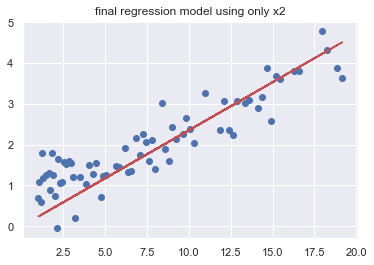

In [250]:
plt.scatter(X_trainf,y_trainf)
plt.plot(X_trainf,Predict_trainf,'r')
plt.title('final regression model using only x2')

summary: 2b: From the all three models after backword selection we see that VIF values have decresed 
        as we have eleminated the depenedent variables from the model.and there is no change in R^2
        

summary 2c: As we elemenate the dependent features the VIF values decrease also beta values decreases
.In the initial raw model both values are too high.that was not a good model.

summary 2d:
From the all three models ther training and testing RMSEs are equal and very low (<1).
This means all the three models are predicting well for both training and test data.this means multicollinearity doesn’t affect how well the model fits.but if we want to study effect of individual features on the regression. this will create problem as both p-values and beta-values are high in case of multicollinearlty .
    

summary 2.e : Although there are many methods available for reducing multicollinearity based on our
    goals but they all have potential drwabacks such as PCA, partial least squares regression etc
    linearly combining predictors(adding) etc.
    If we are using regression only for prediction purpose ,we can do it enen it has multicollinearity.